<a href="https://colab.research.google.com/github/giangntgg/CourseProject/blob/main/02_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 3.1 MB 43.8 MB/s 
     |████████████████████████████████| 3.3 MB 47.0 MB/s 
     |████████████████████████████████| 1.2 MB 49.9 MB/s 
     |████████████████████████████████| 61 kB 509 kB/s 
     |████████████████████████████████| 895 kB 35.3 MB/s 
     |████████████████████████████████| 596 kB 40.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=015d5f0e582d23013e5f82f9c2b71fc35e4a56fdceebe30cfea73ea30b7aab24
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import numpy as np
%matplotlib inline
from joblib import dump, load

In [ ]:
#title, source, jobSkill
docs = pd.read_csv('https://raw.githubusercontent.com/giangntgg/CourseProject/main/dataset.csv')
docs = docs[['jobDescription', 'jobFunctions']].rename(columns = {'jobDescription' : 'title', 'jobFunctions': 'jobSkill'})
docs['source'] = 'jobDescription'

skills = pd.read_csv('https://raw.githubusercontent.com/giangntgg/CourseProject/main/Skill%20Description.csv')
docs_origin = pd.concat([docs, skills])
docs_origin = docs_origin.drop(columns = ['Unnamed: 0'])
docs_origin = docs_origin.dropna()

In [ ]:
skills.shape[0]

170

In [ ]:
docs_origin.shape[0]
docs_origin

,title,jobSkill,source
0,Summary\n\nThe Senior Kernel Software Develope...,"Engineering, Information Technology",jobDescription
1,IT Executive (Web & CRM Developer)Sky Premium ...,Information Technology,jobDescription
2,"Job Description\n\n161132\n\nSingapore, Singap...","Engineering, Information Technology",jobDescription
3,About OneConnectOneConnect is a fast-growing f...,Information Technology,jobDescription
4,ABOUT MONEYTHOR Moneythor is a software compan...,"Engineering, Information Technology",jobDescription
...,...,...,...
165,A free and open-source graphics device driver ...,Graphics card driver software,skillDescription
166,"In computers, a printer driver or a print proc...",Printer driver software,skillDescription
167,Computer-aided manufacturing (CAM) also known ...,Computer aided design CAD and computer aided m...,skillDescription
168,Software asset management (SAM) is a business...,Procedure management software,skillDescription


**Read and Clean Data**

In [ ]:
def clean_text(df):
  # remove entering 
  df['clean_title'] = df['title'].replace('\n', '').replace('\r', '')
  print('Remove entering...')

  # remove URL's 
  df['clean_title'] = df['clean_title'].apply(lambda x: re.sub(r'http\S+', '', x))
  print('Remove HTTPS...')

  # convert text to lowercase
  df['clean_title'] = df['clean_title'].str.lower()
  print('Lowercasing...')

  # remove numbers
  df['clean_title'] = df['clean_title'].str.replace("[0-9]", " ")
  print('Remove numbers...')

  # remove whitespaces
  df['clean_title'] = df['clean_title'].apply(lambda x:' '.join(x.split()))
  print('Remove whitespaces...')

  # remove empty tokens
  df['clean_title'] = df['clean_title'].apply(lambda x: ''.join(ch for ch in x if len(ch) > 0)) 
  print('Remove empty tokens...')

  return df 

# import spaCy's language model
nlp = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

docs = clean_text(docs_origin)
docs['clean_title'] = lemmatization(docs['clean_title'])
docs = docs['clean_title'].to_list()

Remove entering...
Remove HTTPS...
Lowercasing...
Remove numbers...
Remove whitespaces...
Remove empty tokens...


In [ ]:
docs[0:5]

['summary the senior kernel software developer for macos report to the head of mac subgroup of kernel team and be responsible for all macos kernel and other system rnd task , the architectural design of the develop component and responsibility that be delegated to -PRON- by the head of mac subgroup of kernel team . responsibility be effective in the role of kernel and system level component developer for macos . linux kernel development experience may also be required.be effective in the role of the reverse engineer . effectively communicate with malware / security researcher / reverse engineer in the common tasks.participate in the architectural design of both macos platform - specific and cross - platform component develop by the kernel team , along with -PRON- integration with component from other team . be responsible for functionality , robustness , performance and scalability of design solutions.maintain exist component of mac subgroup of kernel team , fix bug in -PRON- in the ti

**TD-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(use_idf=True).fit_transform(docs)

**BERT**

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
docs_embeddings = embedder.encode(docs)

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/555 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/505 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

**K Means Clustering - BERT**

In [ ]:
def kmeans_plot(data):
  inertia = []
  for cluster in range(1, 500, 10):
      kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state = 42)
      kmeans.fit(data)
      inertia.append(kmeans.inertia_)
  df = pd.DataFrame({'Cluster':range (1, 500, 10), 'inertia': inertia})
  return df

Text(0, 0.5, 'Inertia')

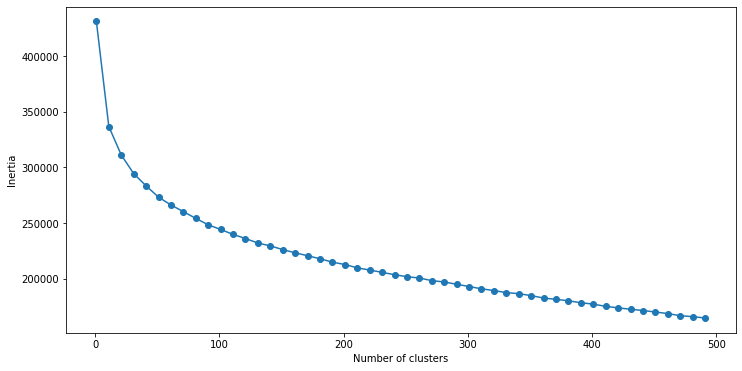

In [ ]:
result_bert = kmeans_plot(docs_embeddings)
plt.figure(figsize = (12,6))
plt.plot(result_bert['Cluster'], result_bert['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

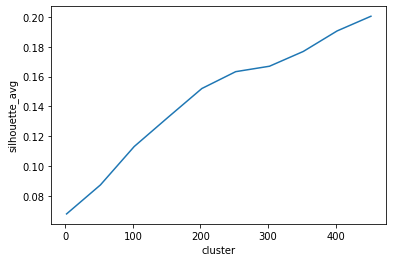

In [ ]:
result = []
for cluster in range(2, 500, 50):
      kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state = 42)
      cluster_labels = kmeans.fit_predict(docs_embeddings)
      silhouette_avg = silhouette_score(docs_embeddings, cluster_labels)
      result.append(silhouette_avg)

df = pd.DataFrame()
df['cluster'] = range(2, 500, 50)
df['silhouette_avg'] = result
sns.lineplot(data = df, x = 'cluster', y  = 'silhouette_avg')

So the best cluster number is around 50 approximately 

In [ ]:
num_clusters = 50
kmeans = KMeans(random_state = 42, n_clusters = num_clusters, init='k-means++')
kmeans.fit(docs_embeddings)

cluster_assignment = kmeans.labels_
clustered_sentences = [[] for i in range(num_clusters)]

for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(docs[sentence_id])

Save the k-means model and the result of the cluster for further analysis

In [ ]:
dump(kmeans, 'BERT_JobClustering.joblib') 

['BERT_JobClustering.joblib']

In [ ]:
docs_origin['BERT Cluster'] = cluster_assignment

# COUNT NUMBER OF JOBS IN EACH CLUSTER
count = docs_origin.groupby('BERT Cluster')[['title']].count().reset_index()

# SEE WHICH SKILL IN WHICH CLUSTER
skill_belong = docs_origin[docs_origin.source == 'skillDescription'].groupby(['BERT Cluster'])['jobSkill'].apply(lambda x: ','.join(x)).reset_index()

# IDENTIFY THE INDUSTRY THAT THESE SKILLS HAVE
industry = docs_origin[docs_origin.source == 'jobDescription'][['BERT Cluster', 'jobSkill']].drop_duplicates()
industry = industry.groupby(['BERT Cluster'])['jobSkill'].apply(lambda x: ','.join(x)).reset_index()

# MERGE ALL TGT TO GET THE FINAL MASTER FILE
total = industry.merge(skill_belong, on = ['BERT Cluster'], how = 'left') \
                .merge(count, on = ['BERT Cluster'], how = 'left') 
                
total.to_csv('BERT Skill Group.csv')

**K Means Clustering - TF IDF**

Explore via elbow method

In [ ]:
def kmeans_plot(data):
  inertia = []
  for cluster in range(1, 1000, 100):
      kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state = 42)
      kmeans.fit(data)
      inertia.append(kmeans.inertia_)
  df = pd.DataFrame({'Cluster':range (1, 1000, 100), 'inertia': inertia})
  return df

Text(0, 0.5, 'Inertia')

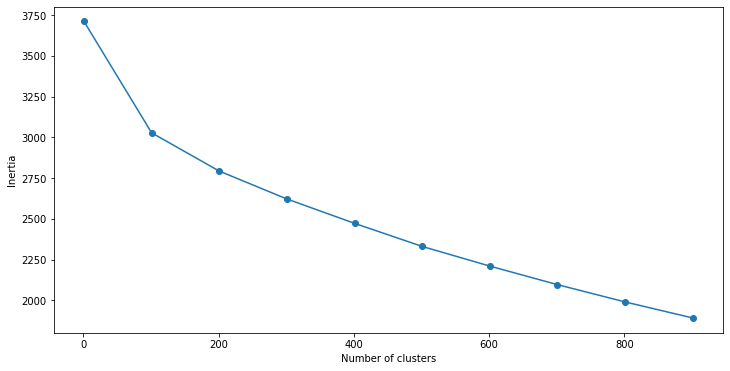

In [ ]:
result_tfidf = kmeans_plot(tfidf)
plt.figure(figsize = (12,6))
plt.plot(result_tfidf['Cluster'], result_tfidf['inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Explore via silhouette score

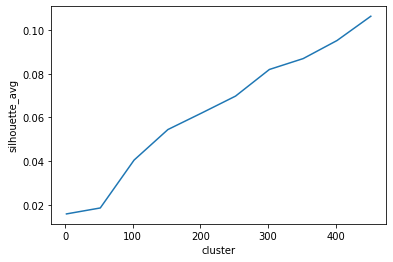

In [ ]:
result = []
for cluster in range(2, 500, 50):
      kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state = 42)
      cluster_labels = kmeans.fit_predict(tfidf)
      silhouette_avg = silhouette_score(tfidf, cluster_labels)
      result.append(silhouette_avg)

df = pd.DataFrame()
df['cluster'] = range(2, 500, 50)
df['silhouette_avg'] = result
sns.lineplot(data = df, x = 'cluster', y  = 'silhouette_avg')

So the best number of cluster is around 150 

In [60]:
num_clusters = 150
means = KMeans(random_state = 42, n_clusters = num_clusters, init='k-means++')
means.fit(tfidf)

cluster_assignment = means.labels_

Save the k-means model and the result by TF-IDF

In [ ]:
dump(means, 'TFIDF_JobClustering.joblib') 

['TFIDF_JobClustering.joblib']

In [61]:
docs_origin['TFIDF Cluster'] = cluster_assignment

# COUNT NUMBER OF JOBS IN EACH CLUSTER
count = docs_origin.groupby('TFIDF Cluster')[['title']].count().reset_index()

# SEE WHICH SKILL IN WHICH CLUSTER
skill_belong = docs_origin[docs_origin.source == 'skillDescription'].groupby(['TFIDF Cluster'])['jobSkill'].apply(lambda x: ','.join(x)).reset_index()

# IDENTIFY THE INDUSTRY THAT THESE SKILLS HAVE
industry = docs_origin[docs_origin.source == 'jobDescription'][['TFIDF Cluster', 'jobSkill']].drop_duplicates()
industry = industry.groupby(['TFIDF Cluster'])['jobSkill'].apply(lambda x: ','.join(x)).reset_index()

# MERGE ALL TGT TO GET THE FINAL MASTER FILE
total = industry.merge(skill_belong, on = ['TFIDF Cluster'], how = 'left') \
                .merge(count, on = ['TFIDF Cluster'], how = 'left') 
                
total.to_csv('TFIDF Skill Group.csv')

Save the final classified file

In [62]:
docs_origin.to_csv('Job Description with Cluster Assignment.csv')